# Brute Force With Honeypot Data

This is trivial, just make sure you have columns:
  * 'source_ip'
  * 'target_ip'
  * 'weight'

In [1]:
pip install openpyxl

     |████████████████████████████████| 242 kB 54 kB/s s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Visualize you graph

The sample data given is "dirty." Ideally, clean and transform the data. 

If it's a lot of data, use R, it's way easier.
There's plenty of packages, though all you'll probably need is the 'tidyverse'.

{(93.39698227,
  '142.93.3.154:8080'): Text(0.074216991299516, -0.43377333170918664, '5'),
 ('142.93.3.154:8080',
  95.8685189): Text(0.0403826983641045, -0.4553017046766913, '5'),
 ('142.93.3.154:8080',
  96.41953269): Text(0.11253693468857384, -0.44583208245489486, '5'),
 ('142.93.3.154:8080',
  97.79978407): Text(0.038946419345944, -0.493885459006975, '5'),
 ('142.93.3.154:8080',
  98.71173941): Text(0.1040127489155912, -0.5136040776016313, '5'),
 ('142.93.3.154:8080',
  55.42083274): Text(0.06747593938661474, -0.5200120086078727, '5'),
 ('142.93.3.154:8080',
  57.37545681): Text(0.12434185544289303, -0.48229091327630585, '5'),
 (55.68147782,
  '45.79.67.84:80'): Text(-0.997301880782753, -0.10283915293625898, '5'),
 (55.9025185,
  '93.179.202.24:41258'): Text(0.1664565094961193, 0.39246284443520063, '5'),
 ('93.179.202.24:41258',
  57.73618001): Text(0.10904687001699609, 0.36574616404401405, '5'),
 (95.25127066,
  '43.224.180.214:8080'): Text(0.8809126919387482, 0.641869581934712, '

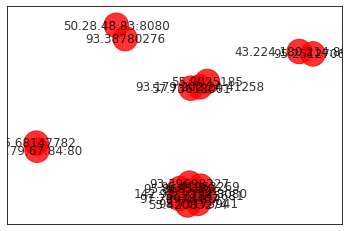

In [2]:
import pandas as pd
import networkx as nx
from networkx import Graph
import matplotlib.pyplot as plt

# TODO: Change this to whatever filename you uploaded
src = 'honey_pot.xlsx'

df = pd.read_excel(src)
nx_graph = nx.convert_matrix.from_pandas_edgelist(df, 'source_ip', 'destination_ip',  edge_attr='weight')

# Some styling
default_axes = plt.axes(frameon=True)
colors = ['r' for node in nx_graph.nodes()]
pos = nx.spring_layout(nx_graph)
nx.draw_networkx(nx_graph, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
edge_labels = nx.get_edge_attributes(nx_graph, 'weight')
nx.draw_networkx_edge_labels(nx_graph, pos=pos, edge_labels=edge_labels)

## Create a Matrix

This is unecessary, but makes the code a lot more concise

In [3]:
import numpy as np

# Map Nodes to indexes of a list
n = nx_graph.number_of_nodes()
nodes = list(nx_graph.nodes)

# Computing the weight matrix from the random graph
w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = nx_graph.get_edge_data(nodes[i],nodes[j],default=0)
        if temp != 0:
            w[i,j] = temp['weight']
print(w)

[[0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [5. 0. 5. 5. 5. 5. 5. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 5. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


### Now You Brute Force

__Do not__ run this if there are any disjoint (isolated) Nodes, you'll get an infinite loop.

Run at your own risk...

In [5]:
# best_cost_brute = 0
# for b in range(2**n):
#     x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
#     cost = 0
#     for i in range(n):
#         for j in range(n):
#             cost = cost + w[i,j]*x[i]*(1-x[j])
#     if best_cost_brute < cost:
#         best_cost_brute = cost
#         xbest_brute = x
#     print('case = ' + str(x)+ ' cost = ' + str(cost))

# colors = ['r' if xbest_brute[i] == 0 else 'c' for i in range(n)]
# draw_graph(G, colors, pos)
# print('\nBest solution = ' + str(xbest_brute) + ' cost = ' + str(best_cost_brute))

__All Done__